# Convolutional Neural Network Model

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

In [2]:
img_rows, img_cols = 28,28
batch_size = 128
num_classes = 10
epochs = 10
dropout = 0.5

In [3]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()
orig_test = X_test

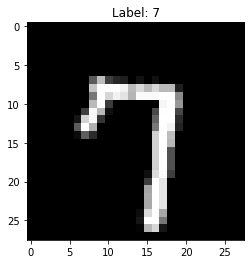

In [6]:
index = random.randrange(1000)
plt.imshow(orig_test[index],cmap ='gray')
plt.title('Label: %d'% y_test[index])
plt.show()

In [7]:
if K.image_data_format()== 'channels_first':
    X_train = X_train.reshape(X_train.shape[0],1,img_rows,img_cols)
    X_test = X_test.reshape(X_test.shape[0],1,img_rows,img_cols)
    input_shape = (1,img_rows,img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
    X_test = X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
    input_shape = (img_rows,img_cols,1)
    
X_train,X_test = X_train /255.0, X_test/255.0
print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test sample')


60000 train samples
10000 test sample


In [8]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu',input_shape= input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 158s 3ms/sample - loss: 0.2300 - accuracy: 0.9305 - val_loss: 0.0493 - val_accuracy: 0.9838
Epoch 2/10
60000/60000 [==============================] - 172s 3ms/sample - loss: 0.0831 - accuracy: 0.9756 - val_loss: 0.0368 - val_accuracy: 0.9870
Epoch 3/10
60000/60000 [==============================] - 163s 3ms/sample - loss: 0.0627 - accuracy: 0.9805 - val_loss: 0.0366 - val_accuracy: 0.9875
Epoch 4/10
60000/60000 [==============================] - 161s 3ms/sample - loss: 0.0523 - accuracy: 0.9838 - val_loss: 0.0291 - val_accuracy: 0.9894
Epoch 5/10
60000/60000 [==============================] - 163s 3ms/sample - loss: 0.0425 - accuracy: 0.9864 - val_loss: 0.0312 - val_accuracy: 0.9890
Epoch 6/10
60000/60000 [==============================] - 171s 3ms/sample - loss: 0.0380 - accuracy: 0.9877 - val_loss: 0.0301 - val_accuracy: 0.9898
Epoch 7/10
60000/60000 [==========================

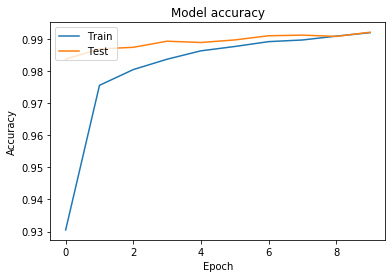

In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
history = model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,y_test))
score = model.evaluate(X_test,y_test,verbose = 0)
print('Test Loss:',score[0])
print('Test Accuracy',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [10]:
predictions = model.predict(X_test)
most_likely = predictions.argmax(1)

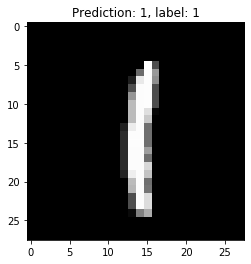

In [13]:
index = random.randrange(1000)
plt.title('Prediction: %d, label: %d'%(most_likely[index],y_test[index]))
plt.imshow(orig_test[index],cmap='gray')
plt.show()

# Error Analysis

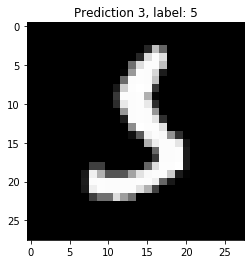

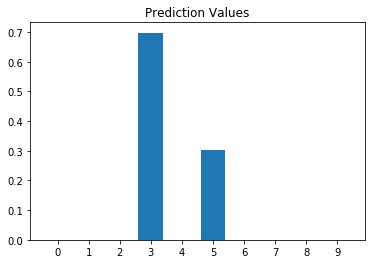

In [17]:
for i in range(10000):
    index = random.randrange(10000)
    if most_likely[index]!=y_test[index]:
        break
    
plt.imshow(orig_test[index],cmap='gray')
plt.title('Prediction %d, label: %d'%(most_likely[index],y_test[index]))
plt.show()

plt.bar(range(10),predictions[index],tick_label=range(10))
plt.title('Prediction Values')
plt.show()

# Saving Trained Model

In [18]:
import keras
from keras.datasets import mnist
from keras.models import model_from_json
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

Using TensorFlow backend.


In [22]:
model_structure = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_structure)
model.save_weights("weights.h5")

In [23]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()
orig_test = x_test
x_train, x_test = x_train/255.0, x_test/255.0

In [25]:

predictions = model.predict(X_test)
most_likely = predictions.argmax(1)

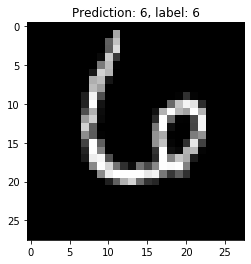

In [26]:
index = random.randrange(10000)
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.imshow(orig_test[index], cmap='gray')
plt.show()

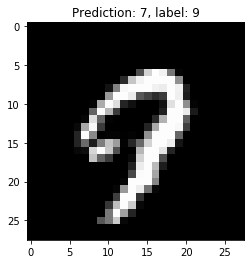

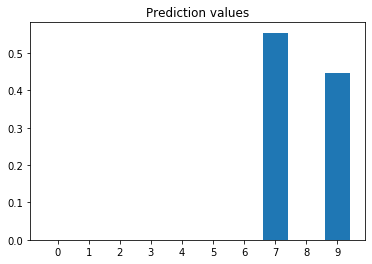

In [27]:

for i in range(10000):
    index = random.randrange(10000)
    if most_likely[index] != y_test[index]:
        break

plt.imshow(orig_test[index], cmap='gray')
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.show()

plt.bar(range(10), predictions[index], tick_label=range(10))
plt.title('Prediction values')
plt.show()

In [28]:
total = 0.0
misclassified = 0.0
for i  in range(10000):
    total +=1
    if most_likely[i]!=y_test[i]:
        misclassified +=1
print('Error rate: %.2f %%'%(100.0*misclassified/total))

Error rate: 0.78 %
